# Exploratory Data Analysis 

The Dataset that was given to us is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights we will gather will be genuine.

### Loading the relevant libraries and the data 

In [1]:
## Loading Important Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
### Loading the data 

data = pd.read_excel("ANZ synthesised transaction dataset.xlsx")

### Converting date to pandas date-time format 

data["date"] = pd.to_datetime(data["date"])


### Viewing the first 5 rows of our data 
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
## Descriptive Statistical Analysis of our data

data.describe(include = "all")

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
count,12043,7717.000000,885.0,12043,12043,12043,12043,7717,883.0,12043,...,12043.000000,7717,7717,12043,12043.000000,12043,12043,12043,7717,12043
unique,2,NaN,3.0,100,1,100,6,5725,NaN,80,...,NaN,1609,8,9442,NaN,12043,1,100,2703,2
top,authorized,NaN,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,106e1272-44ab-4dcb-a438-dd98e0071e51,NaN,Michael,...,NaN,Melbourne,NSW,2018-09-03T11:00:00.000+0000,NaN,b692a782fa3d44cdb138ae170ad76dd6,Australia,CUS-2487424745,151.21 -33.87,debit
freq,7717,NaN,883.0,578,12043,578,3934,14,NaN,746,...,NaN,255,2169,10,NaN,1,12043,578,145,11160
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.802644,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,30.582330,NaN,NaN,NaN,187.933588,NaN,NaN,NaN,NaN,NaN
std,NaN,0.398029,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,10.046343,NaN,NaN,NaN,592.599934,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,18.000000,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,22.000000,NaN,NaN,NaN,16.000000,NaN,NaN,NaN,NaN,NaN


In [5]:
## Shape of the data

print(data.shape)

(12043, 23)


From the above observation we confirm that the dataset contains 100 unique accounts. 12043 transactions and 23 features. 

Now after careful analysis we also observe that some of these features are not required for our analysis. So, we are dropping irrelevant features and keeping only those features that adds value to our analysis. 

In [6]:
## Dropping irrelevant features

data = data[["status","card_present_flag","balance","date",
                   "gender","age","merchant_suburb","merchant_state",
                   "amount","customer_id","movement"]]

In [7]:
# Viewing the dataset in hand

data.head()

,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement
0,authorized,1.0,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit
1,authorized,0.0,21.20,2018-08-01,F,26,Sydney,NSW,14.19,CUS-2487424745,debit
2,authorized,1.0,5.71,2018-08-01,M,38,Sydney,NSW,6.42,CUS-2142601169,debit
3,authorized,1.0,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,CUS-1614226872,debit
4,authorized,1.0,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,debit


### Exploring the Data 

#### Customer transaction count for each day.

In [8]:
data_date = data.groupby("date").count()

avg_trans_count = data_date["customer_id"].mean()

n_points = len(data_date.index)

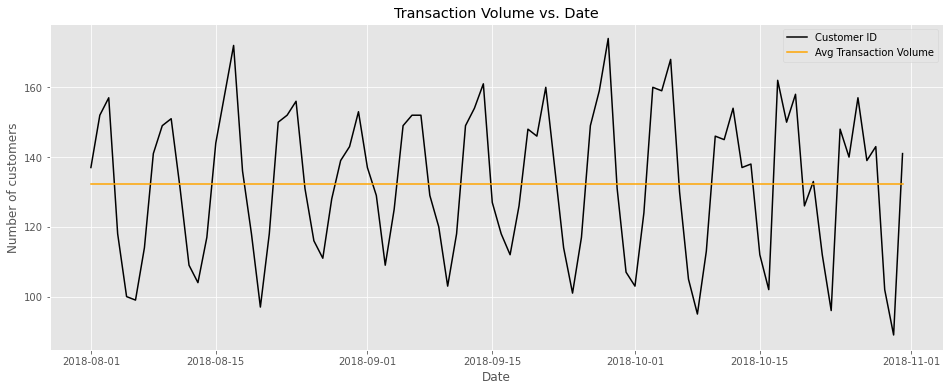

In [9]:
plt.figure(figsize=(16, 6))
plt.plot(data_date.index, data_date["customer_id"], c="black", label = "Customer ID")
plt.plot(data_date.index, np.linspace(avg_trans_count,avg_trans_count,n_points), c="orange", label = "Avg Transaction Volume")
plt.title("Transaction Volume vs. Date")
plt.xlabel("Date")
plt.ylabel("Number of customers")
plt.legend()

In [10]:
print("The number of average customer transactions perday is " , avg_trans_count )

The number of average customer transactions perday is  132.34065934065933


#### Mean transaction amount for each day.

In [11]:
data_date_mean = data.groupby("date").mean()


avg_trans_amt = data_date_mean["amount"].mean()


n_points = len(data_date.index)

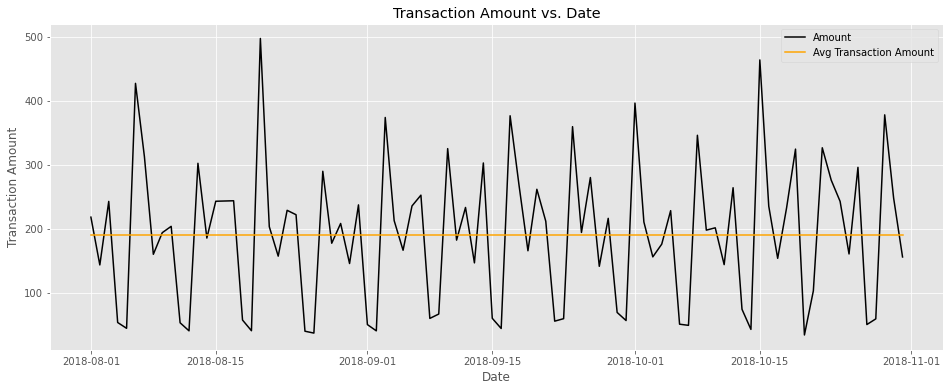

In [12]:
plt.figure(figsize=(16, 6))
plt.plot(data_date_mean.index, data_date_mean["amount"], c="black", label = "Amount")
plt.plot(data_date_mean.index, np.linspace(avg_trans_amt,avg_trans_amt,n_points), c="orange", label = "Avg Transaction Amount")
plt.title("Transaction Amount vs. Date")
plt.xlabel("Date")
plt.ylabel("Transaction Amount")
plt.legend()

In [13]:
print("The average transaction amount is " , avg_trans_amt,"$")

The average transaction amount is  190.61056774083966 $


#### Average transaction amount by gender

In [14]:
gender_avg = data.groupby(["date","gender"])["amount"].mean().reset_index()
gender_avg.head()

,date,gender,amount
0,2018-08-01,F,191.952676
1,2018-08-01,M,246.050000
2,2018-08-02,F,85.452899
3,2018-08-02,M,191.446627
4,2018-08-03,F,216.349241


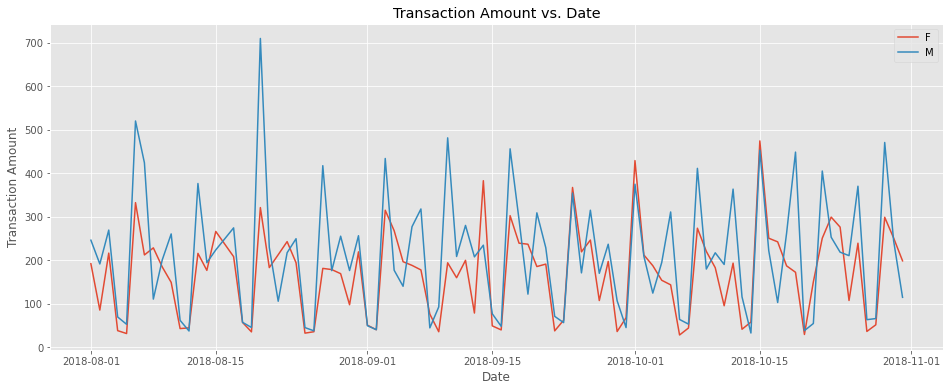

In [15]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="amount",x="date",hue="gender", data=gender_avg)
plt.title("Transaction Amount vs. Date")
plt.xlabel("Date")
plt.ylabel("Transaction Amount")
plt.legend()

#### Transaction amount by age

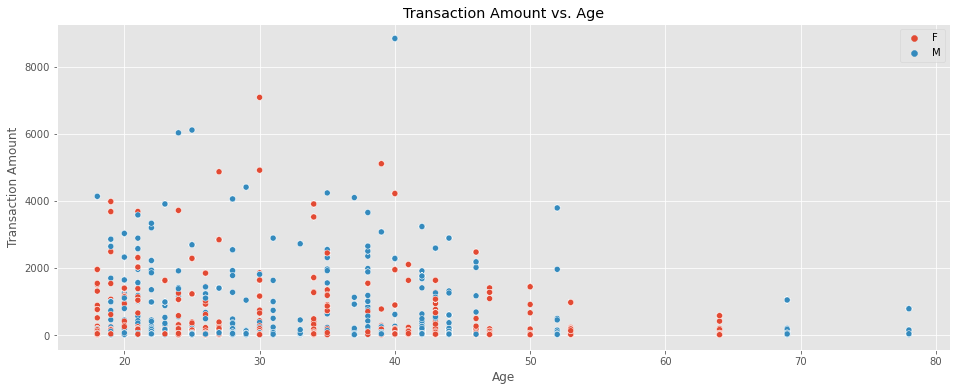

In [16]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=data, x="age",hue="gender", y="amount")
plt.title("Transaction Amount vs. Age")
plt.xlabel("Age")
plt.ylabel("Transaction Amount")
plt.legend()

#### Total transaction amount by age 

In [17]:
total_age_amt= data.groupby(['age',"gender"])["amount"].sum().reset_index()
total_age_amt.head()

,age,gender,amount
0,18,F,45124.14
1,18,M,34020.50
2,19,F,84318.80
3,19,M,61733.92
4,20,F,49579.79


Text(0, 0.5, 'Total Transaction Amount')

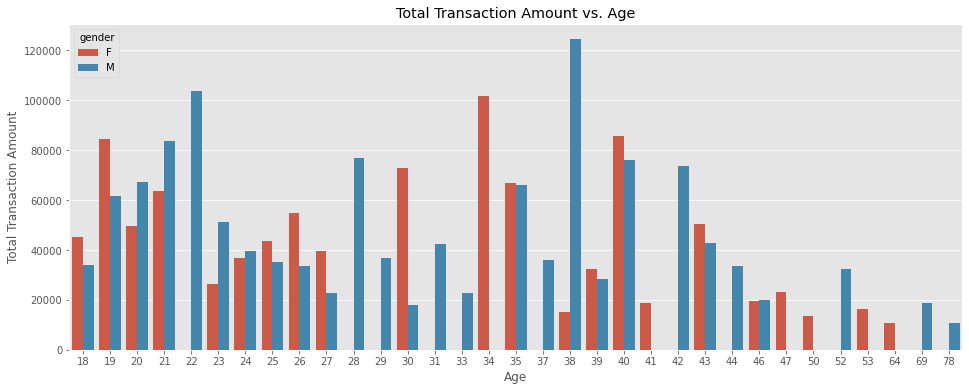

In [18]:
plt.figure(figsize=(16, 6))
sns.barplot(y="amount", x="age",hue ="gender" ,data=total_age_amt)
plt.title("Total Transaction Amount vs. Age")
plt.xlabel("Age")
plt.ylabel("Total Transaction Amount")

#### Movement type Debit or Credit ?

In [19]:
debitorcredit= data.groupby(["movement"])["amount"].mean().reset_index()
debitorcredit

,movement,amount
0,credit,1898.728029
1,debit,52.572343


Text(0, 0.5, 'Amount')

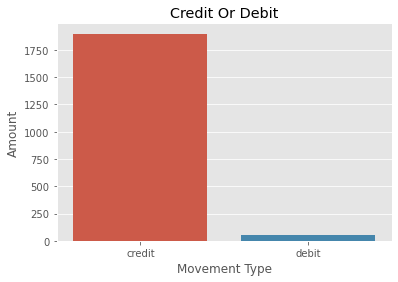

In [20]:
sns.barplot(y="amount", x="movement",data=debitorcredit)
plt.title("Credit Or Debit")
plt.xlabel("Movement Type")
plt.ylabel("Amount")

#### Segregating the data by weekday,month and analyzing

In [21]:
data['month'] = pd.DatetimeIndex(data['date']).month

In [22]:
data

,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement,month
0,authorized,1.0,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit,8
1,authorized,0.0,21.20,2018-08-01,F,26,Sydney,NSW,14.19,CUS-2487424745,debit,8
2,authorized,1.0,5.71,2018-08-01,M,38,Sydney,NSW,6.42,CUS-2142601169,debit,8
3,authorized,1.0,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,CUS-1614226872,debit,8
4,authorized,1.0,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,debit,8
...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,14054.14,2018-10-31,F,30,Ringwood,VIC,9.79,CUS-55310383,debit,10
12039,authorized,1.0,9137.79,2018-10-31,M,20,Casula,NSW,63.87,CUS-2688605418,debit,10
12040,authorized,1.0,45394.57,2018-10-31,M,28,Kings Park,NSW,43.96,CUS-2663907001,debit,10
12041,authorized,1.0,11350.67,2018-10-31,M,69,Oakleigh,VIC,30.77,CUS-1388323263,debit,10


#### Transaction Amount for the month of August

In [23]:
data_aug = data[data["month"] == 8]

In [24]:
data_aug

,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement,month
0,authorized,1.0,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit,8
1,authorized,0.0,21.20,2018-08-01,F,26,Sydney,NSW,14.19,CUS-2487424745,debit,8
2,authorized,1.0,5.71,2018-08-01,M,38,Sydney,NSW,6.42,CUS-2142601169,debit,8
3,authorized,1.0,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,CUS-1614226872,debit,8
4,authorized,1.0,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,debit,8
...,...,...,...,...,...,...,...,...,...,...,...,...
3938,authorized,1.0,12624.72,2018-08-31,M,23,Castle Hill,NSW,21.86,CUS-1462656821,debit,8
3939,authorized,1.0,3295.80,2018-08-31,F,26,Bondi Beach,NSW,43.57,CUS-331942311,debit,8
3940,authorized,1.0,3288.26,2018-08-31,M,30,Chermside,QLD,14.46,CUS-860700529,debit,8
3941,authorized,1.0,10213.95,2018-08-31,F,35,Docklands,VIC,11.06,CUS-2155701614,debit,8


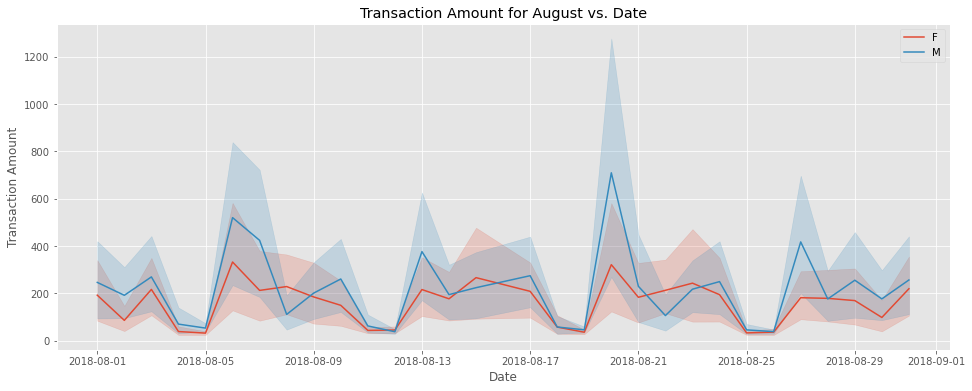

In [25]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="amount",x="date",hue="gender", data=data_aug)
plt.title("Transaction Amount for August vs. Date")
plt.xlabel("Date")
plt.ylabel("Transaction Amount")
plt.legend()

In [26]:
avg_trans_amt_aug= data_aug["amount"].mean()
print("The Average Transaction amount for the month of August is - ", avg_trans_amt_aug)

The Average Transaction amount for the month of August is -  185.12186659903654


#### Transaction Amount for the month of September

In [27]:
data_sep = data[data["month"] == 9]
data_sep

,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement,month
3943,authorized,1.0,3279.11,2018-09-01,M,30,Redbank,QLD,9.15,CUS-860700529,debit,9
3944,authorized,1.0,2810.78,2018-09-01,M,23,Parramatta,NSW,85.84,CUS-511326734,debit,9
3945,authorized,1.0,5204.51,2018-09-01,M,31,Ryde,NSW,15.66,CUS-2083971310,debit,9
3946,authorized,1.0,3196.81,2018-09-01,M,24,Bairnsdale,VIC,14.87,CUS-1433879684,debit,9
3947,posted,NaN,4280.38,2018-09-01,F,25,NaN,NaN,26.00,CUS-1669695324,debit,9
...,...,...,...,...,...,...,...,...,...,...,...,...
7951,authorized,1.0,3751.01,2018-09-30,M,24,Lilydale,VIC,17.36,CUS-1433879684,debit,9
7952,authorized,1.0,3641.60,2018-09-30,F,40,Oakleigh,VIC,21.62,CUS-1614226872,debit,9
7953,authorized,1.0,4600.16,2018-09-30,M,37,Southport,QLD,8.33,CUS-2695611575,debit,9
7954,authorized,1.0,3621.48,2018-09-30,F,40,Alexandra Hills,QLD,20.12,CUS-1614226872,debit,9


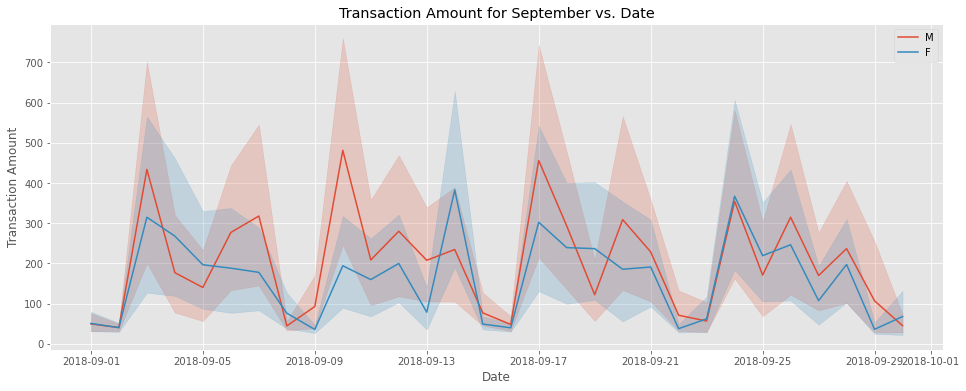

In [28]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="amount",x="date",hue="gender", data=data_sep)
plt.title("Transaction Amount for September vs. Date")
plt.xlabel("Date")
plt.ylabel("Transaction Amount")
plt.legend()

In [29]:
avg_trans_amt_sep= data_sep["amount"].mean()
print("The Average Transaction amount for the month of September is - ", avg_trans_amt_sep)

The Average Transaction amount for the month of September is -  182.04590331422853


#### Transaction amount for the month of October 

In [30]:
data_oct = data[data["month"] == 10]
data_oct

,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement,month
7956,authorized,0.0,753.36,2018-10-01,M,38,Melbourne,VIC,29.57,CUS-2142601169,debit,10
7957,authorized,0.0,744.92,2018-10-01,M,38,Macquarie Park,NSW,8.44,CUS-2142601169,debit,10
7958,posted,NaN,6674.32,2018-10-01,M,20,NaN,NaN,163.00,CUS-2688605418,debit,10
7959,authorized,0.0,6061.80,2018-10-01,F,34,Helensvale,QLD,10.65,CUS-4142663097,debit,10
7960,posted,NaN,14252.66,2018-10-01,M,39,NaN,NaN,33.00,CUS-1790886359,debit,10
...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,14054.14,2018-10-31,F,30,Ringwood,VIC,9.79,CUS-55310383,debit,10
12039,authorized,1.0,9137.79,2018-10-31,M,20,Casula,NSW,63.87,CUS-2688605418,debit,10
12040,authorized,1.0,45394.57,2018-10-31,M,28,Kings Park,NSW,43.96,CUS-2663907001,debit,10
12041,authorized,1.0,11350.67,2018-10-31,M,69,Oakleigh,VIC,30.77,CUS-1388323263,debit,10


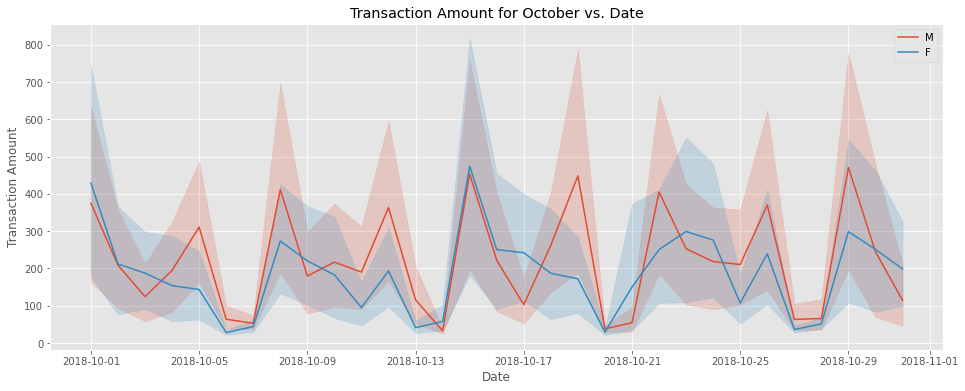

In [31]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="amount",x="date",hue="gender", data=data_oct)
plt.title("Transaction Amount for October vs. Date")
plt.xlabel("Date")
plt.ylabel("Transaction Amount")
plt.legend()

In [32]:
avg_trans_amt_oct= data_oct["amount"].mean()
print("The Average Transaction amount for the month of October is - ", avg_trans_amt_oct)

The Average Transaction amount for the month of October is -  196.42732321996542
